## 03. 수신거부여부
- '수신거부여부_TM/DM/메일/SMS'


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

             ID Segment  수신거부여부_TM  수신거부여부_DM  수신거부여부_메일  수신거부여부_SMS
0  TRAIN_000000       D          0          0          0           0
1  TRAIN_000001       E          0          0          0           0
2  TRAIN_000002       C          0          0          0           0
3  TRAIN_000003       D          0          0          0           0
4  TRAIN_000004       E          0          0          0           0


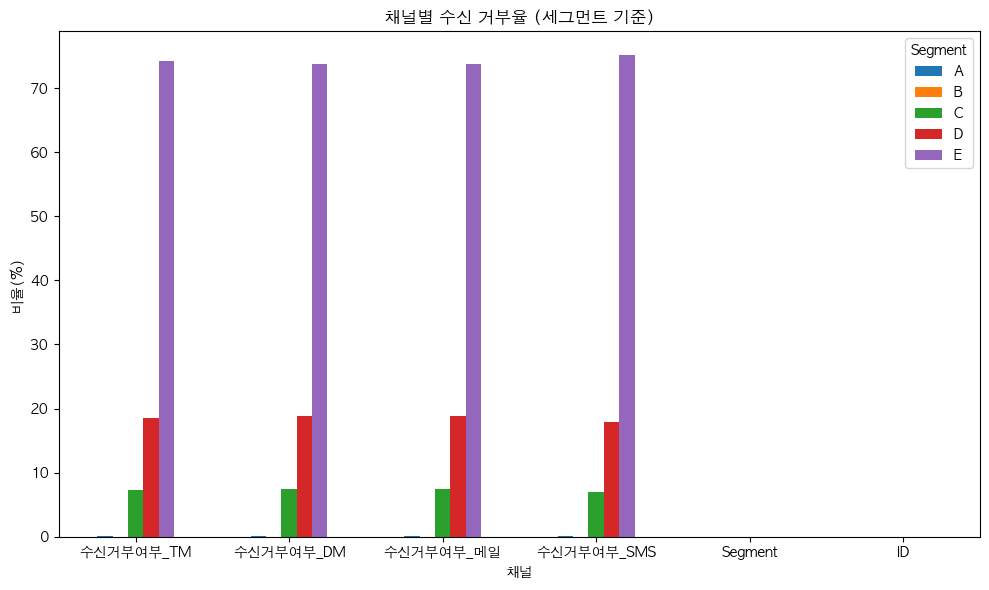

Segment,A,B,C,D,E
채널,,,,,
수신거부여부_TM,0.06,0.01,7.22,18.52,74.19
수신거부여부_DM,0.06,0.01,7.39,18.81,73.73
수신거부여부_메일,0.06,0.01,7.39,18.82,73.72
수신거부여부_SMS,0.06,0.01,7.03,17.82,75.09
Segment,NaN,NaN,NaN,NaN,NaN
ID,NaN,NaN,NaN,NaN,NaN


In [8]:
import pandas as pd

# 분석에 필요한 컬럼만 지정
usecols = ['수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', 'Segment', 'ID']

# 필요한 컬럼만 불러오기
df = pd.read_csv("../data/train/1.회원정보/train_회원정보.csv", usecols=usecols)

print(df.head())
# 세그먼트별 수신 거부율 계산
refuse_distribution = {}

for col in usecols:
    segment_percent = df[df[col] == 1]["Segment"].value_counts(normalize=True).sort_index()
    refuse_distribution[col] = (segment_percent * 100).round(2)

# 데이터프레임으로 변환
refuse_df = pd.DataFrame(refuse_distribution).T
refuse_df.columns.name = "Segment"
refuse_df.index.name = "채널"

import matplotlib.pyplot as plt
refuse_df.plot(kind="bar", figsize=(10, 6), title="채널별 수신 거부율 (세그먼트 기준)", ylabel="비율(%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 확인
display(refuse_df)

- 유의미한 결과가 없음

## 04. 카드소지여부
- '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용'


             ID Segment  소지여부_신용  소지카드수_유효_신용  소지카드수_이용가능_신용
0  TRAIN_000000       D        1            1              1
1  TRAIN_000001       E        1            1              1
2  TRAIN_000002       C        1            1              1
3  TRAIN_000003       D        1            2              2
4  TRAIN_000004       E        1            1              1


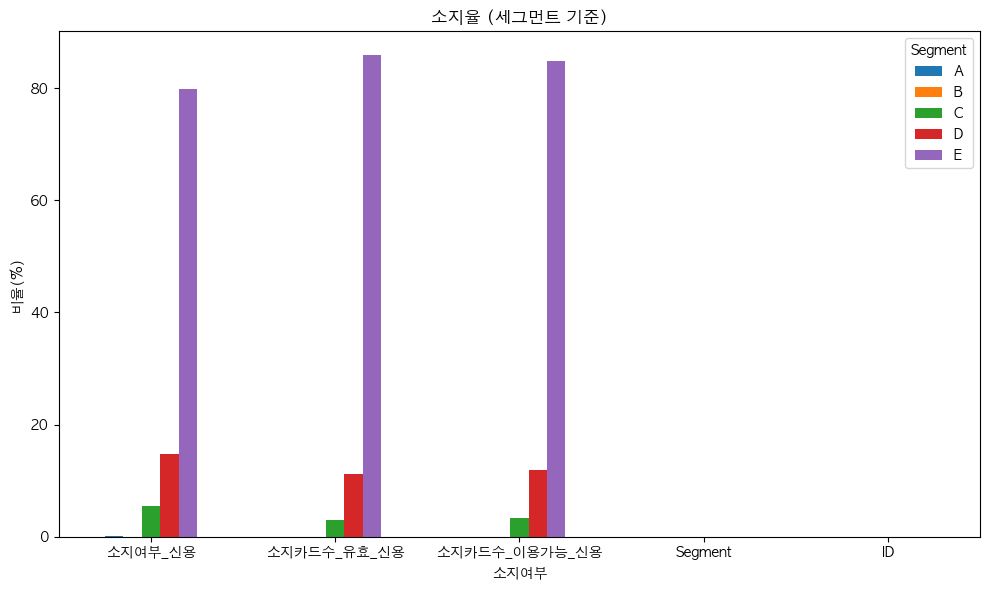

Segment,A,B,C,D,E
소지여부,,,,,
소지여부_신용,0.04,0.01,5.41,14.78,79.76
소지카드수_유효_신용,0.01,0.00,3.02,11.15,85.82
소지카드수_이용가능_신용,0.01,0.00,3.27,11.81,84.90
Segment,NaN,NaN,NaN,NaN,NaN
ID,NaN,NaN,NaN,NaN,NaN


In [26]:
import pandas as pd

# 분석에 필요한 컬럼만 지정
usecols = [ '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', 'Segment', 'ID']

# 필요한 컬럼만 불러오기
df = pd.read_csv("../data/train/1.회원정보/train_회원정보.csv", usecols=usecols)

print(df.head())
# 세그먼트별 계산
refuse_distribution = {}

for col in usecols:
    segment_percent = df[df[col] == 1]["Segment"].value_counts(normalize=True).sort_index()
    refuse_distribution[col] = (segment_percent * 100).round(2)

# 데이터프레임으로 변환
refuse_df = pd.DataFrame(refuse_distribution).T
refuse_df.columns.name = "Segment"
refuse_df.index.name = "소지여부"

import matplotlib.pyplot as plt
refuse_df.plot(kind="bar", figsize=(10, 6), title="소지율 (세그먼트 기준)", ylabel="비율(%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 확인
display(refuse_df)

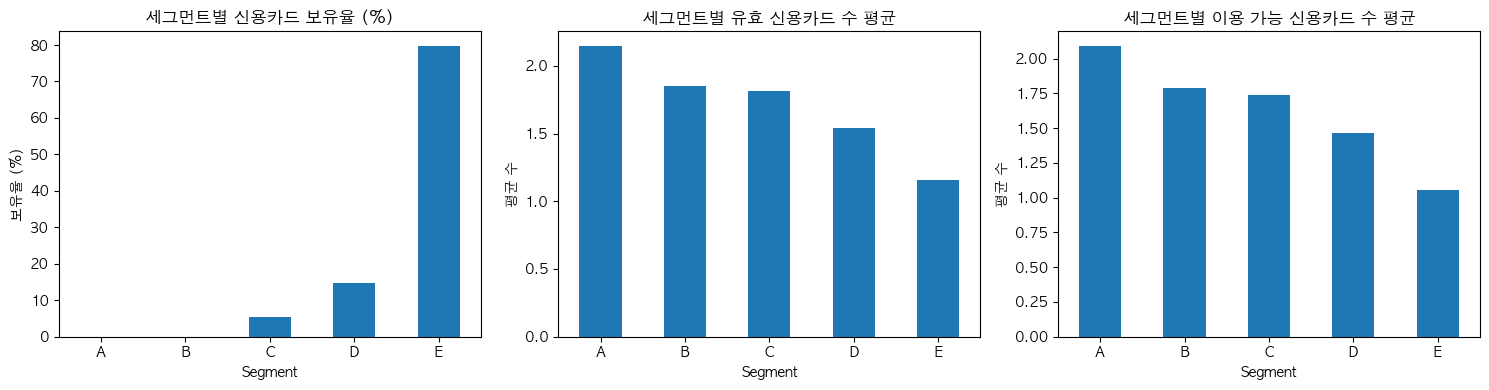

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# 데이터 로드
# 분석에 필요한 컬럼만 지정
usecols = [ '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', 'Segment', 'ID']

# [1] 소지여부신용: 세그먼트별 1 비율 시각화
ownership_rate = df[df["소지여부_신용"] == 1]["Segment"].value_counts(normalize=True).sort_index() * 100

# [2] 카드 수량 변수: 세그먼트별 평균
mean_valid = df.groupby("Segment")["소지카드수_유효_신용"].mean().sort_index()
mean_usable = df.groupby("Segment")["소지카드수_이용가능_신용"].mean().sort_index()

# 시각화: 1행 3열로 배치
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 소지여부신용
ownership_rate.plot(kind="bar", ax=axes[0], title="세그먼트별 신용카드 보유율 (%)", ylabel="보유율 (%)")
axes[0].set_xticklabels(ownership_rate.index, rotation=0)

# 소지카드수유효신용
mean_valid.plot(kind="bar", ax=axes[1], title="세그먼트별 유효 신용카드 수 평균", ylabel="평균 수")
axes[1].set_xticklabels(mean_valid.index, rotation=0)

# 소지카드수이용가능신용
mean_usable.plot(kind="bar", ax=axes[2], title="세그먼트별 이용 가능 신용카드 수 평균", ylabel="평균 수")
axes[2].set_xticklabels(mean_usable.index, rotation=0)

plt.tight_layout()
plt.show()


In [30]:
# 총 인원 수
segment_total = df["Segment"].value_counts().sort_index()

# 신용카드 보유자 수 (소지여부신용 == 1)
segment_owners = df[df["소지여부_신용"] == 1]["Segment"].value_counts().sort_index()

# 데이터프레임으로 병합
card_ownership_df = pd.DataFrame({
    "총 인원 수": segment_total,
    "신용카드 보유자 수": segment_owners,
})

# 비율 추가 (보유율)
card_ownership_df["보유율 (%)"] = (card_ownership_df["신용카드 보유자 수"] / card_ownership_df["총 인원 수"] * 100).round(2)

print(card_ownership_df)

          총 인원 수  신용카드 보유자 수  보유율 (%)
Segment                              
A            972         972   100.00
B            144         144   100.00
C         127590      127480    99.91
D         349242      348616    99.82
E        1922052     1880901    97.86


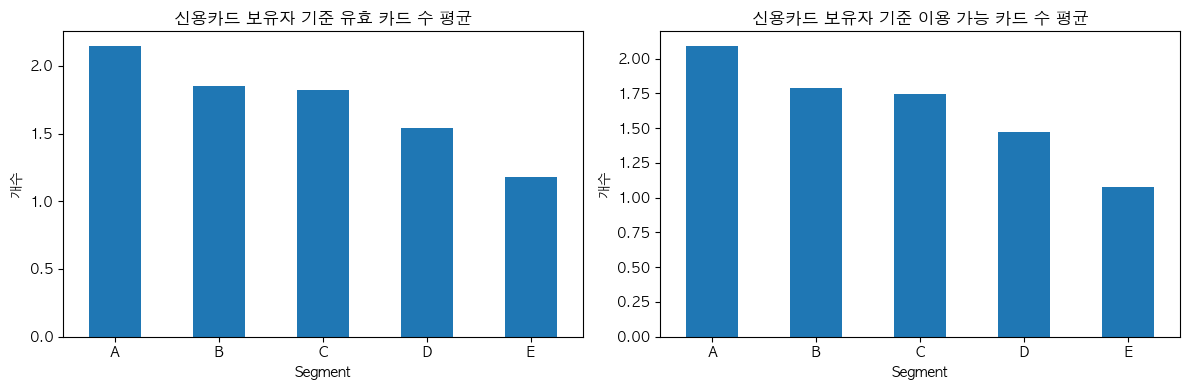

In [34]:
# 1. 신용카드 보유자만 필터링
df_owner = df[df["소지여부_신용"] == 1]

# 2. 세그먼트별 평균 계산
valid_avg_by_owner = df_owner.groupby("Segment")["소지카드수_유효_신용"].mean().sort_index()
usable_avg_by_owner = df_owner.groupby("Segment")["소지카드수_이용가능_신용"].mean().sort_index()

# 3. 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

valid_avg_by_owner.plot(kind="bar", ax=axes[0], title="신용카드 보유자 기준 유효 카드 수 평균", ylabel="개수")
axes[0].set_xticklabels(valid_avg_by_owner.index, rotation=0)

usable_avg_by_owner.plot(kind="bar", ax=axes[1], title="신용카드 보유자 기준 이용 가능 카드 수 평균", ylabel="개수")
axes[1].set_xticklabels(usable_avg_by_owner.index, rotation=0)

plt.tight_layout()
plt.show()

- 신용카드를 많이들 보유하고 계셔서 딱히 차이는 없군
